# Task Description and Instructions

A telecom company wishes to reduce customer response times by implementing a language detection agent which can quickly identify the language of a customer's message. The company has a large number of customer messages in different languages. The model should be able to detect the language of a message with a high degree of accuracy. After detecting the language, the company can then route the message to the appropriate department for a response.

In this regard, you have been provided with a dataset of texts and languages (a total of 17 languages). Use this to come up with a solution. However, you are restricted to work within the following scope:

1. You can only use Naive Bayes OR ANNs to solve this problem. You cannot use both.
2. You can only use the following libraries: Numpy, Pandas, Matplotlib, Seaborn, Scikit-learn, Keras, and Tensorflow. (NLTK is not allowed)
3. A template has been shared that reads the data and randomizes it. You are required to use this template to ensure randomization is applied to your data before building a pipeline of any kind.
4. You are free to use feature extraction techniques of your choice. However, your choice will greatly affect your final score. (Read on the advantages and disadvantages of each technique to pick the best one given the problem at hand)
5. To save on time, the feature extraction technique you choose can have a min of 100 features and a max of 10,000 features.
6. If you pick ANN, you are free to use any number of layers in your ANN. However, you are required to use at least 2 layers with at least 2 neurons in each layer.
7. If you pick Naive Bayes, the default Multinomial Naive Bayes is the only one you can use. However, you can modify its parameters.

All files provided are available in the attached zipped file

## Required Deliverables

1. A Jupyter Notebook with your code and comments. At the very least, you should have a section for each of the following:
Data Preprocessing,
Feature Extraction,
Model Building,
Model Evaluation,
A Confusion Matrix (Plotted using Seaborn to visualize classification results),
Testing and,
Conclusion.

2. The **Testing** section in your Notebook should contain, **A python function that takes in a message and returns the language of the message**.

*A third delivery may be added, for now, work on the above*

## AOB
*Name your notebook using the normal naming convention. For example, if your number is 111111 and in group A, name your notebook A-111111.ipynb*
*In case you need any clarification reach out via an email to eolang@strathmore.edu between 8 am and 10 am on November 28th*

# Imports 

I used poetry to manage the virtual env that is used. All dependancies can be installed by running `poetry install` after installing poetry through pip

In [100]:
import pandas as pd 
import warnings

from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

----

In [101]:
df = pd.read_csv('language.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,Text,Language
0,В сентябре 2008 года Википедия получила наград...,Russian
1,τα θαλασσωσα.,Greek
2,En este video te daré 100 oraciones comunes y ...,Spanish
3,det er som om det ikke betyder noget.,Danish
4,നിങ്ങൾ ഇവിടെ എന്താണ് ചെയ്യുന്നത് എന്നതുപോലെയാണ...,Malayalam


-----

In [102]:
data = df.copy()

In [103]:
data.sample(20)

,Text,Language
1272,يمكنك القيام بذلك ، يمكنك تمرير التوفل ، يمكنك...,Arabic
9180,ഈ മൂന്നു ഭാഷകൾ കഴിഞ്ഞാൽ വേറൊരു ഇന്ത്യൻ ഭാഷയിൽ ...,Malayalam
8372,[101][102] Fewer editors become administrators...,English
6565,MediaWiki предоставляет интерфейс для работы с...,Russian
7480,"Some types of ""native flora"" actually have bee...",English
195,pas de soucis.,French
5317,По состоянию на август 2013 года русская Викип...,Russian
1496,Detta gör att encyklopedin är beroende av ett ...,Sweedish
10261,você se importa se eu pular aqui?,Portugeese
2852,no mucho.,Spanish


In [104]:
data["Language"].value_counts()


English       1378
French        1010
Spanish        814
Portugeese     737
Italian        696
Russian        686
Sweedish       668
Malayalam      592
Dutch          545
Arabic         532
Turkish        473
German         469
Tamil          467
Danish         427
Kannada        366
Greek          364
Hindi           63
Name: Language, dtype: int64

## Data Cleaning and Preprocessing

In [105]:
# removal of digits 
data['Text'] = data['Text'].str.replace('\d+','')
# removal of square brackets and other non essential characters 
data['Text'] = data['Text'].str.replace('[\[\]\<\-\»\(\)\«\:]','')
# converting everything to lowercase
data['Text'] = data['Text'].str.lower()
# removing empty rows
data = data.dropna()



In [106]:
data.sample(30)

,Text,Language
10235,δεν θα με νοιαζόταν λιγότερο αν κάποιος σου ρω...,Greek
6111,ahora suponga en su situación en la vida diari...,Spanish
7515,de economie was dit jaar erg traag of de wedst...,Dutch
10083,വിക്കിപീഡിയ സ്ഥാപിതമായതും ക്രിയേറ്റീവ് കോമൺസ് ...,Malayalam
7769,interest related to pattern recognition conti...,English
1836,dit is mijn fout.,Dutch
3986,"kan du holde et øjeblik, tak?",Danish
1149,gå vidare.,Sweedish
6135,"விக்கிப்பீடியாவிலுள்ள தானியங்கிகள், இயக்கத்துக...",Tamil
4373,certains comptes utilisateurs sont utilisés pa...,French


## Label Encoding and Feature Extraction 

In [107]:
# Label Encoding
labels = LabelEncoder()

X = data["Text"]
y = data["Language"]

y = labels.fit_transform(y)


In [108]:

# Feature Extraction
CV = cv()

X_arr = []
for text in X:
    X_arr.append(text)

X = CV.fit_transform(X_arr).toarray()

## Model Building

I chose to use naive_bayes 

In [109]:
# Splits 
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [110]:
#Model Training 

model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

## Model Evaluation and Visualization

##### Accuracy Score 

In [111]:
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(str(accuracy * 100) + "%")

97.68880208333334%


##### Confusion Matrix

<AxesSubplot: >

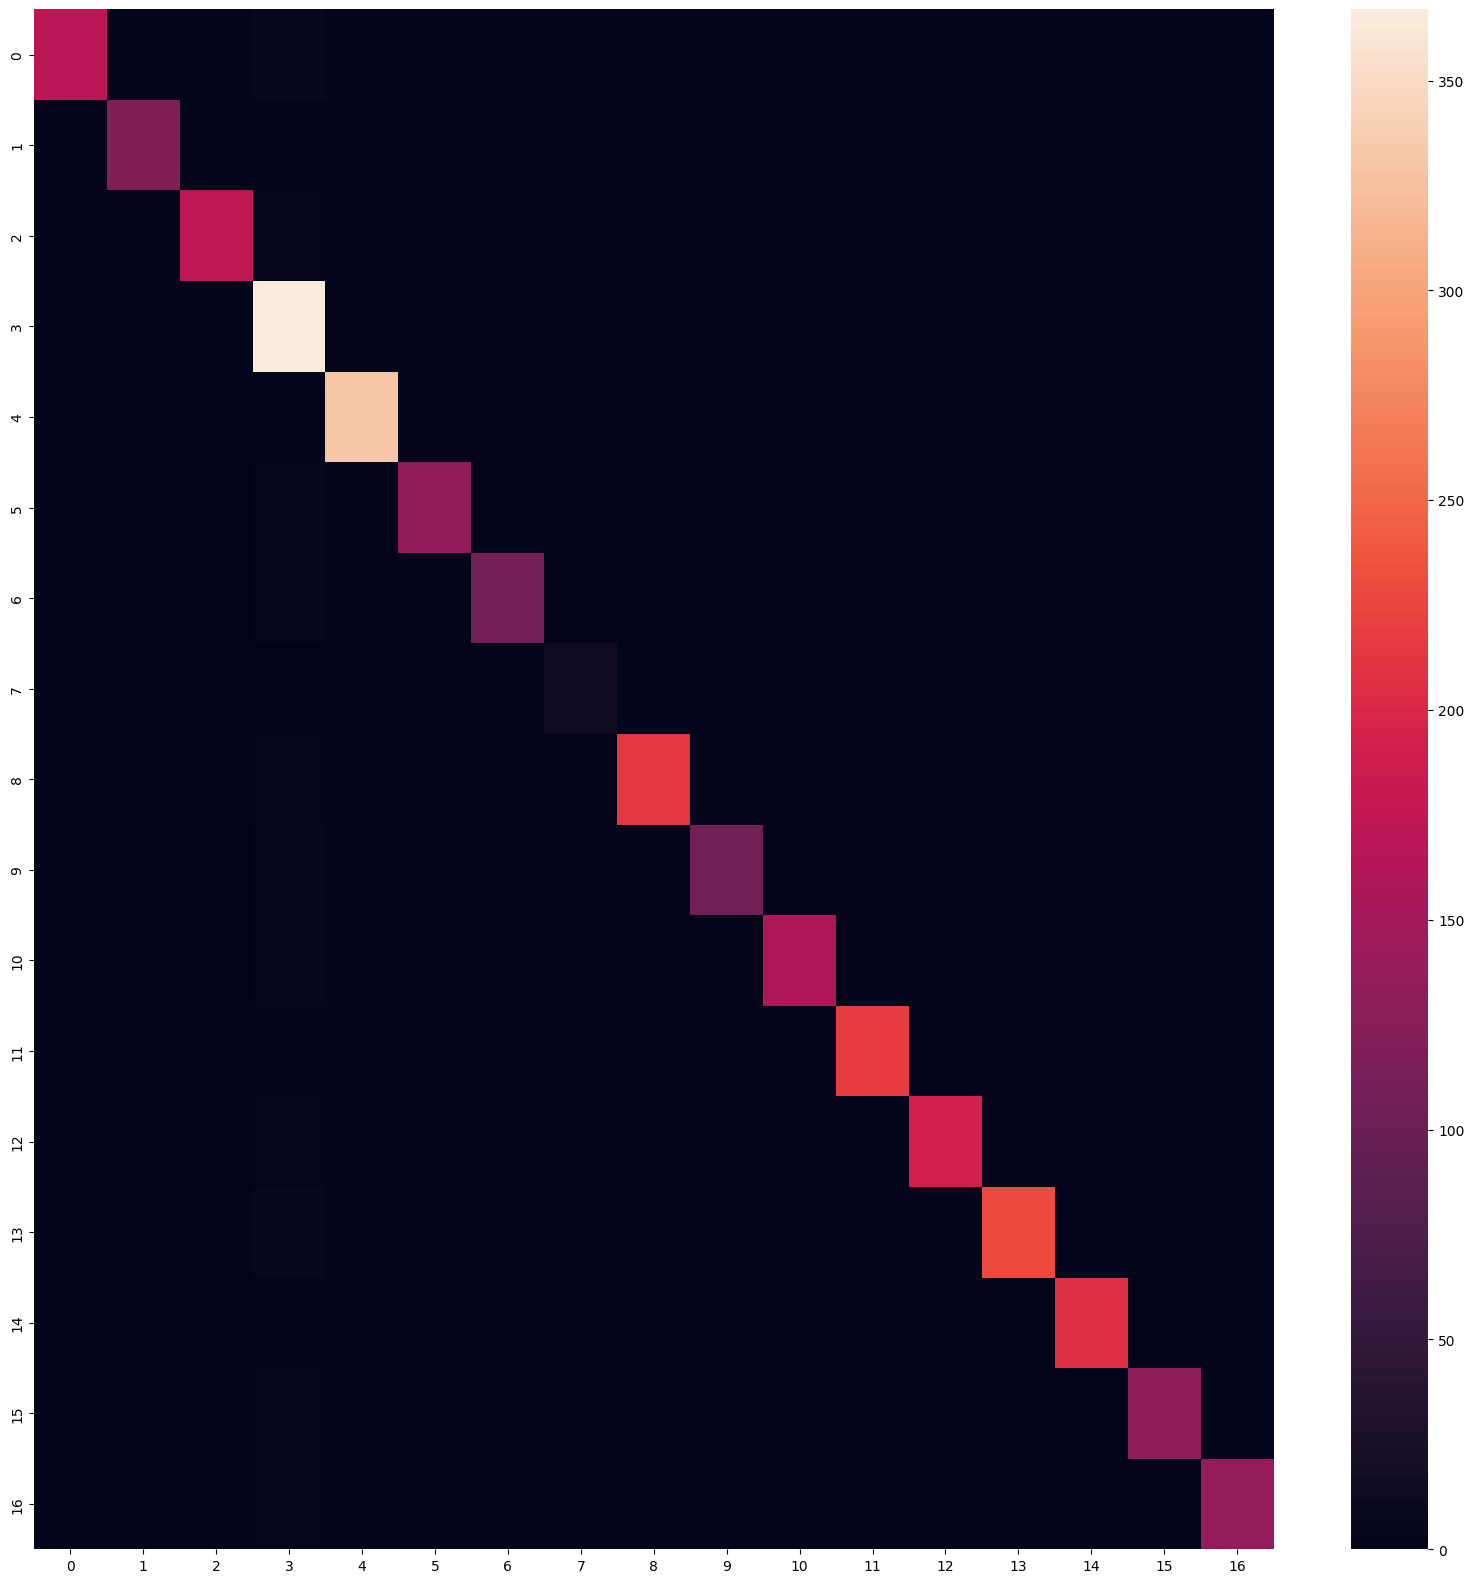

In [112]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(20,20))
sns.heatmap(cm)

## Testing 

In [113]:
def predictLanguage(string):
    x = CV.transform([string])

    label = model.predict(x)

    # as the labels are vectors, the corresponding language has to be found
    result = labels.inverse_transform(label)

    # Probabilities of the models prediction (basically how sure the model is)
    prob = model.predict_proba(x)[0]

    print("Language is: " + str(result[0]))
    print("Percentage Certainty:" + str(round(prob[int(label)] * 100 , 4)) + "%")
    

In [114]:
predictLanguage("Hello World")

Language is: English
Percentage Certainty:70.287%


In [120]:
predictLanguage("Das Auto")

Language is: German
Percentage Certainty:65.8871%


In [121]:
predictLanguage("merci")

Language is: French
Percentage Certainty:50.253%
